# Bar

In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

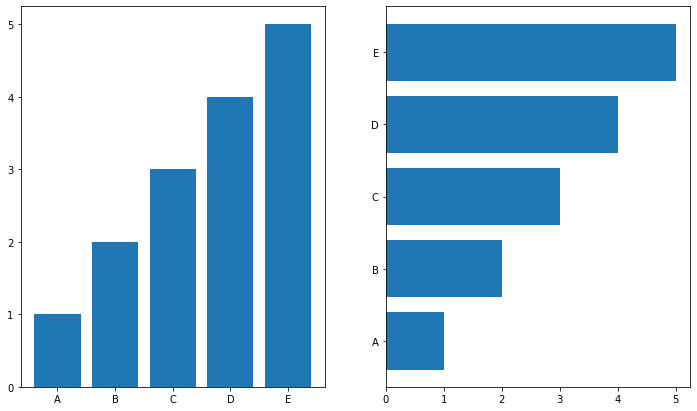

In [3]:
# plt.subplots()

x = list('ABCDE')
y = np.array([1, 2, 3, 4, 5])

fig, axes = plt.subplots(1, 2, figsize=(12,7))

axes[0].bar(x, y)
axes[1].barh(x, y)

plt.show()

In [4]:
student = pd.read_csv('data/StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
student.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
701,female,group B,some high school,standard,none,57,67,72
982,male,group B,some high school,standard,completed,79,85,86
667,female,group B,bachelor's degree,free/reduced,none,77,85,87
775,female,group B,some high school,free/reduced,none,49,58,55
535,female,group C,bachelor's degree,free/reduced,completed,66,83,83


In [6]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
student.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [47]:
# groupby
# value_counts() ?
# sort_index()

group = student.groupby('gender')['race/ethnicity'].value_counts().sort_index()
display(group)

gender  race/ethnicity
female  group A            36
        group B           104
        group C           180
        group D           129
        group E            69
male    group A            53
        group B            86
        group C           139
        group D           133
        group E            71
Name: race/ethnicity, dtype: int64

In [19]:
print(student['gender'].value_counts())

female    518
male      482
Name: gender, dtype: int64


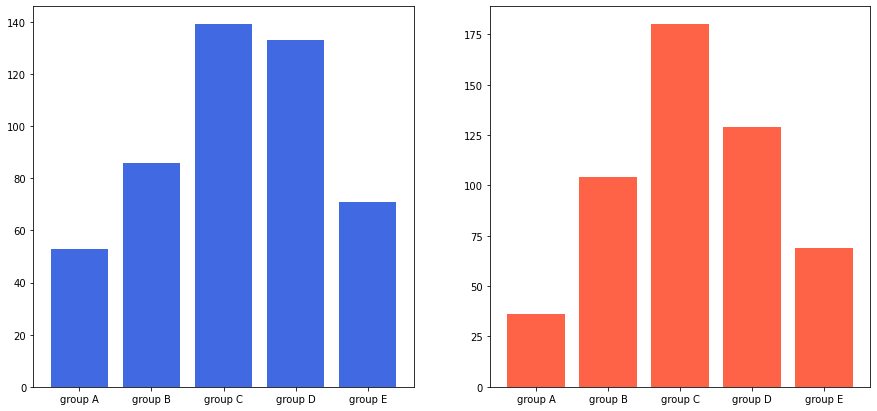

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

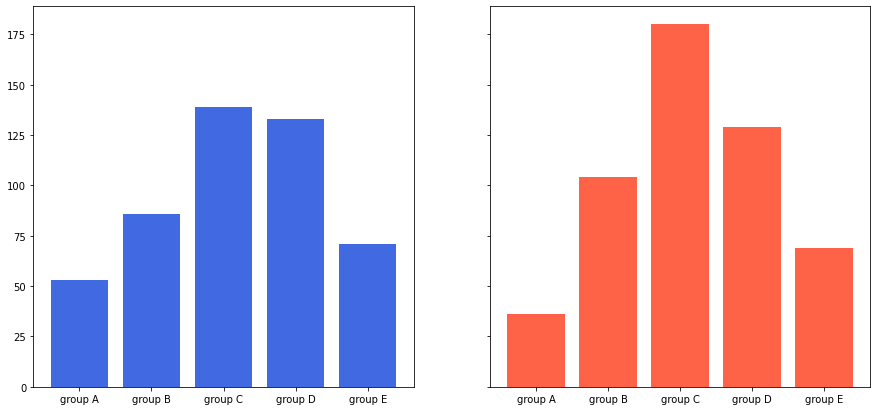

In [49]:
# shared y-axis

# method 1: sharey

fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

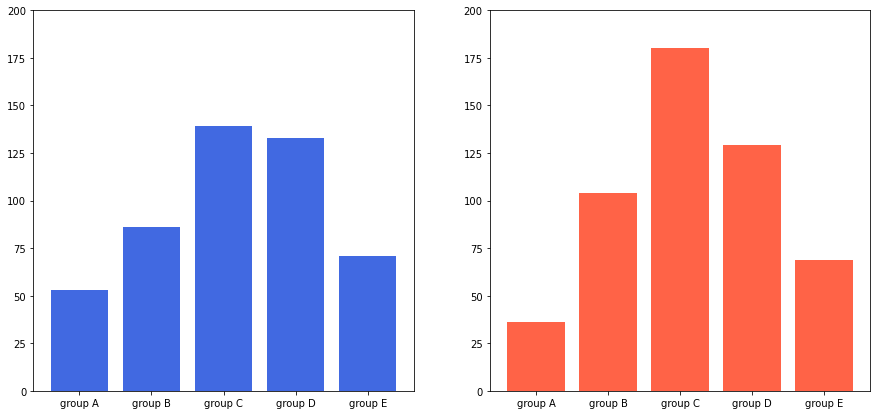

In [50]:
# method 2: set_ylim

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')

for ax in axes:
    ax.set_ylim(0, 200)

plt.show()

### stacked bar plot

In [51]:
group_cnt = student['race/ethnicity'].value_counts().sort_index()
display(group_cnt)

group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

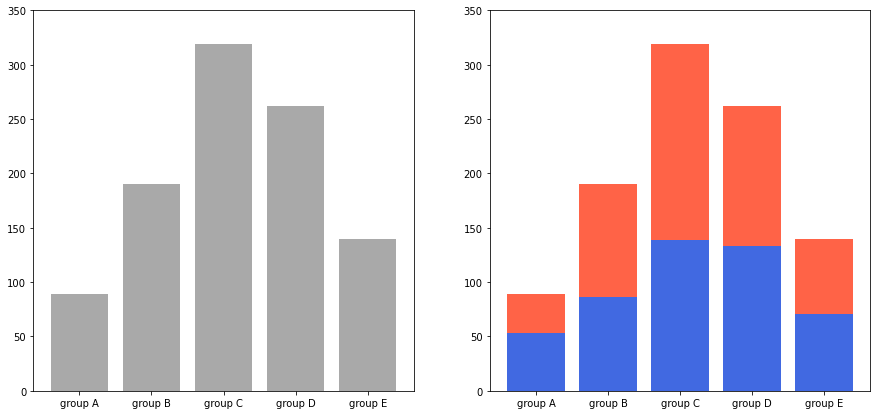

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group_cnt.index, group_cnt, color='darkgray')

axes[1].bar(group['male'].index, group['male'], color='royalblue')
# bottom=group['male']
axes[1].bar(group['female'].index, group['female'], bottom=group['male'], color='tomato')

for ax in axes:
    ax.set_ylim(0, 350)

plt.show()

### percentage stacked bar plot

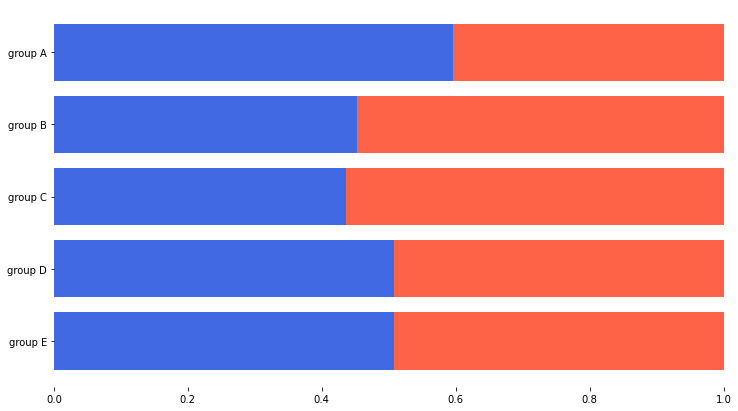

In [53]:
group = group.sort_index(ascending=False)
total = group['male'] + group['female']

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.barh(group['male'].index, group['male']/total, color='royalblue')
ax.barh(group['female'].index, group['female']/total, left=group['male']/total, color='tomato')

ax.set_xlim(0, 1) # margin 제거
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

### overlapped bar plot

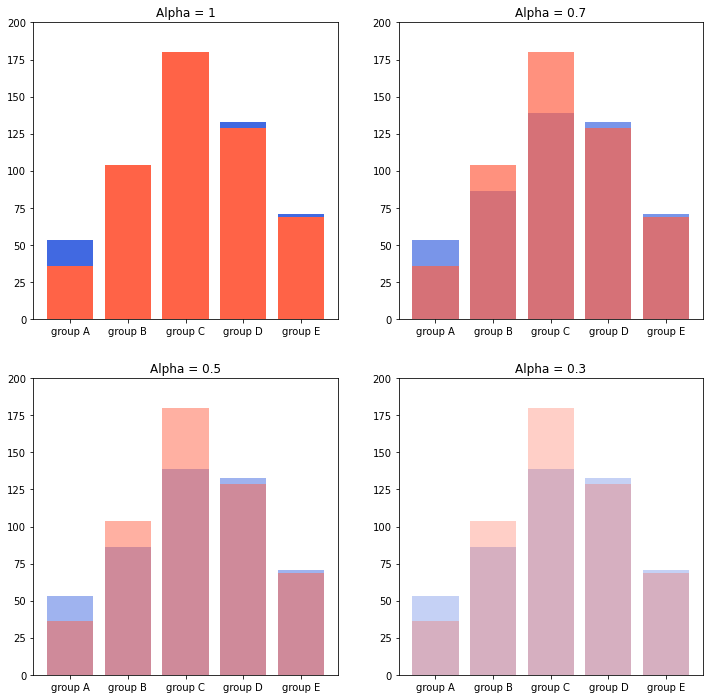

In [54]:
group = group.sort_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, alpha in enumerate([1, 0.7, 0.5, 0.3]):
    axes[idx].bar(group['male'].index, group['male'], color='royalblue', alpha=alpha)
    axes[idx].bar(group['female'].index, group['female'], color='tomato', alpha=alpha)
    axes[idx].set_title(f'Alpha = {alpha}')

for ax in axes:
    ax.set_ylim(0, 200)
    
plt.show()

### grouped bar plot

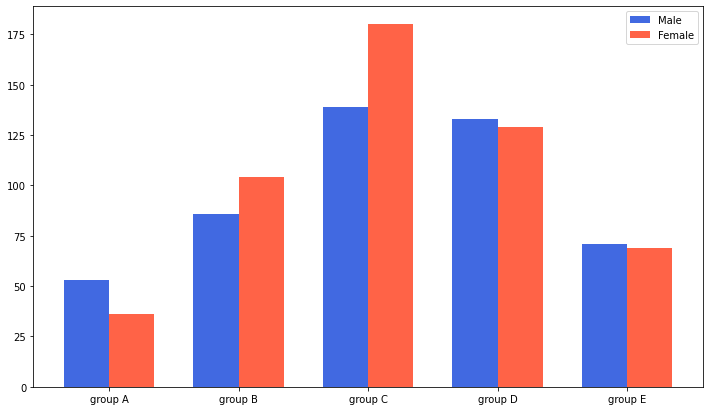

In [55]:
fis, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width = 0.35

ax.bar(idx - width/2, group['male'], color='royalblue', width=width, label='Male')
ax.bar(idx + width/2, group['female'], color='tomato', width=width, label='Female')

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)
ax.legend()

plt.show()

In [45]:
group = student.groupby('parental level of education')['race/ethnicity'].value_counts().sort_index()
group_list = sorted(student['race/ethnicity'].unique())
edu_lv = student['parental level of education'].unique()

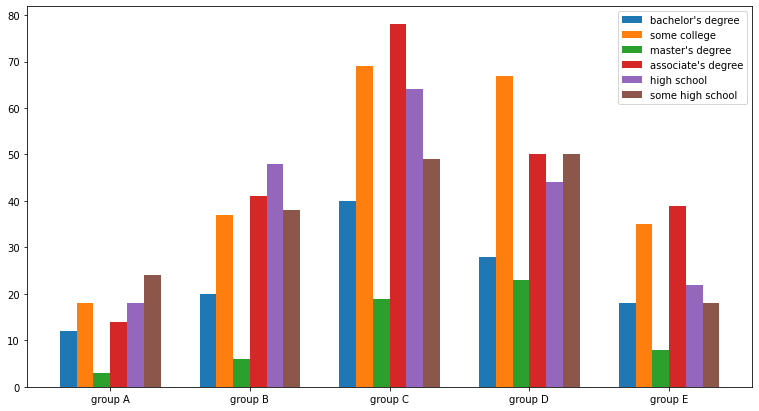

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(13, 7))

x = np.arange(len(group_list))
width = 0.12

for idx, g in enumerate(edu_lv):
    ax.bar(x+(-len(edu_lv)+1+2*idx)*width/2, group[g], 
       width=width, label=g)

ax.set_xticks(x)
ax.set_xticklabels(group_list)
ax.legend()    
    
plt.show()

In [58]:
score = student.groupby('gender').mean().T
score

gender,female,male
math score,63.633205,68.728216
reading score,72.608108,65.473029
writing score,72.467181,63.311203


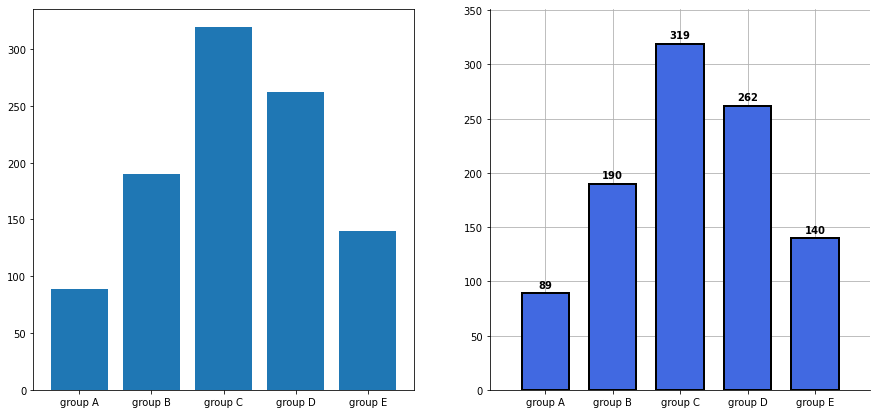

In [78]:
# edge line, margin, grid, value on top

group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig = plt.figure(figsize=(15, 7))

ax_basic = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(1, 2, 2)

ax_basic.bar(group_cnt.index, group_cnt)
ax.bar(group_cnt.index, group_cnt, width=0.7, edgecolor='black', linewidth=2, color='royalblue', zorder=10)

ax.margins(0.1, 0.1)
ax.grid(zorder=0)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

for idx, value in zip(group_cnt.index, group_cnt):
    ax.text(idx, value+5, s=value, ha='center', fontweight='bold')
    
plt.show()

In [79]:
score_var = student.groupby('gender').std().T
score_var

gender,female,male
math score,15.491453,14.356277
reading score,14.378245,13.931832
writing score,14.844842,14.113832


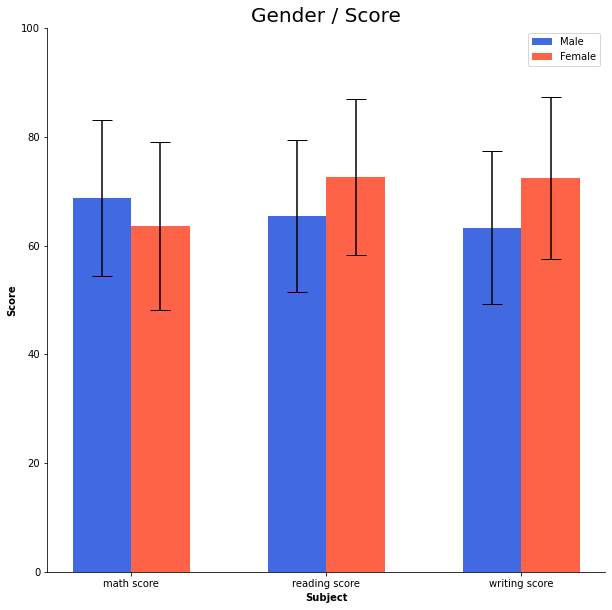

In [84]:
# uncertainty: yerr

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

idx = np.arange(len(score.index))
width = 0.3

ax.bar(idx-width/2, score['male'], 
       color='royalblue',
       width=width,
       label='Male',
       yerr=score_var['male'],
       capsize=10 
      )

ax.bar(idx+width/2, score['female'], 
       color='tomato',
       width=width,
       label='Female',
       yerr=score_var['female'],
       capsize=10
      )

ax.set_xticks(idx)
ax.set_xticklabels(score.index)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
ax.set_title('Gender / Score', fontsize=20)
ax.set_xlabel('Subject', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')

plt.show()

# Line

In [85]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

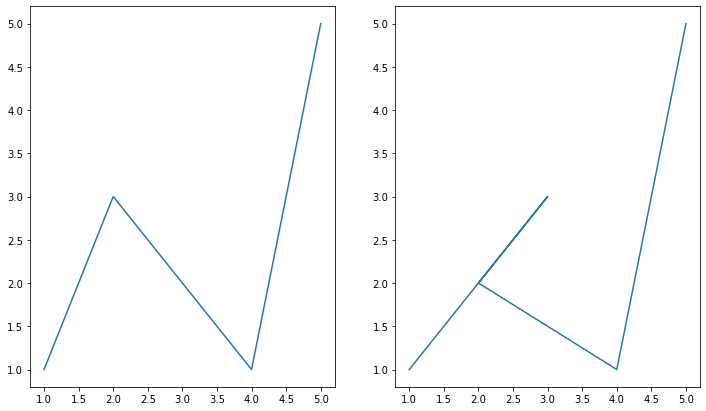

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x1 = [1, 2, 3, 4, 5]
x2 = [1, 3, 2, 4, 5]
y = [1, 3, 2, 1, 5]

axes[0].plot(x1, y)
axes[1].plot(x2, y)

plt.show()

# (x1, y1) -> (x2, y2) 순으로 이어그리는 것.
# 함수가 아님.

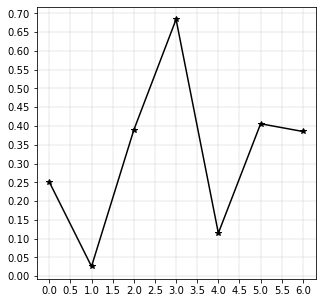

In [117]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

x = np.arange(7)
y = np.random.rand(7) # seven random numbers

ax.plot(x, y,
        color='black',
        marker='*',
        linestyle='solid', 
       )

# set_major_locator
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.05))    
# grid through major locators
ax.grid(linewidth=0.3)  

plt.show()

In [92]:
stock = pd.read_csv('data/prices.csv')
stock

# to_datetime
stock['date'] = pd.to_datetime(stock['date'], format='%Y-%m-%d', errors='raise')

# set_index
stock.set_index("date", inplace = True)
stock

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0


In [93]:
apple = stock[stock['symbol']=='AAPL']
google = stock[stock['symbol']=='GOOGL']
google.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0


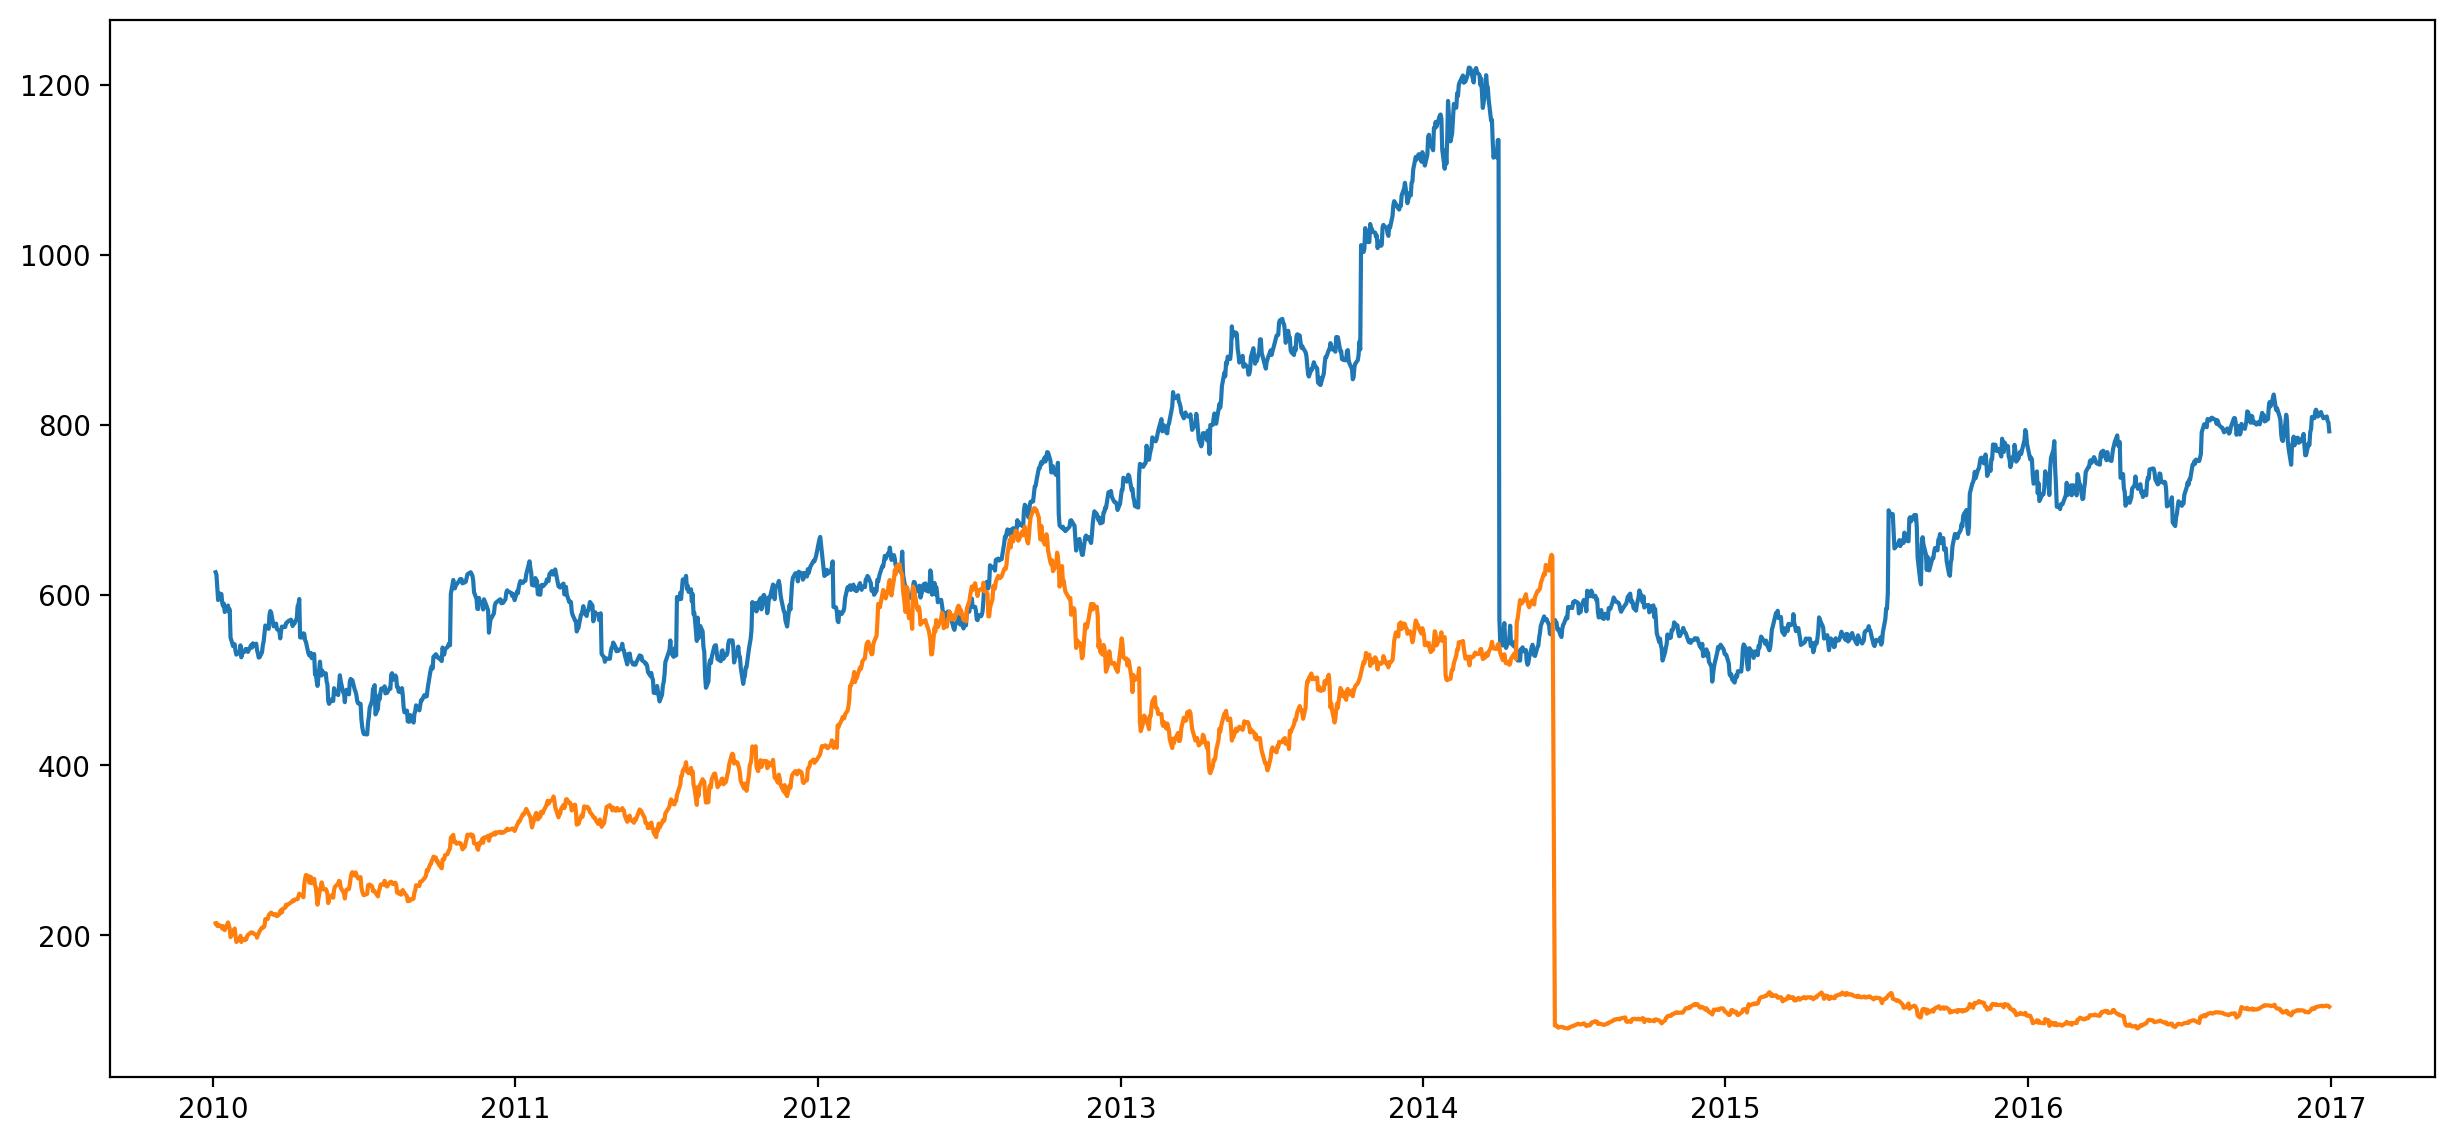

In [106]:
# dpi: dots per inches
fig, ax = plt.subplots(1, 1, figsize=(15, 7), dpi=200)

ax.plot(google.index, google['close'])
ax.plot(apple.index, apple['close'])

plt.show()

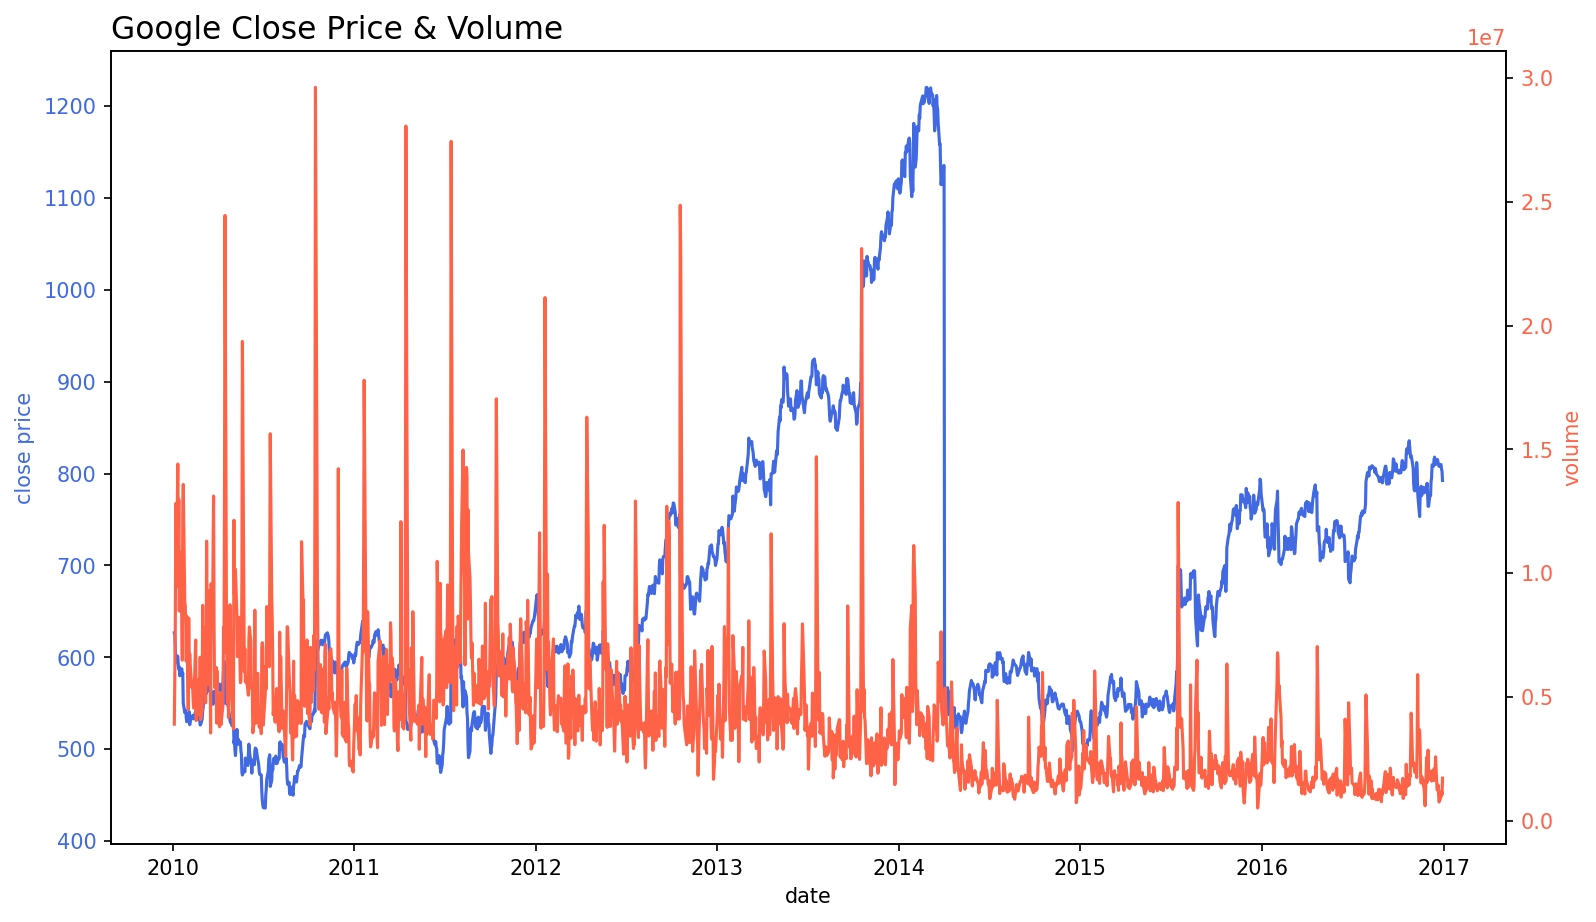

In [123]:
# twinx() - shared x axis

fig, ax1 = plt.subplots(figsize=(12, 7), dpi=150)

color = 'royalblue'
ax1.plot(google.index, google['close'], color=color)
ax1.set_xlabel('date')
ax1.set_ylabel('close price', color=color)  
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tomato'
ax2.plot(google.index, google['volume'], color=color)
ax2.set_ylabel('volume', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Google Close Price & Volume', loc='left', fontsize=15)
plt.show()

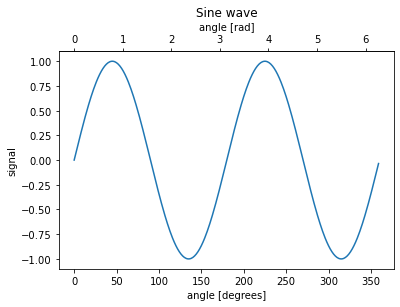

In [129]:
# secondary_xaxis() - shared y axis

def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

fig, ax = plt.subplots()

x = np.arange(0, 360)
y = np.sin(2 * x * np.pi / 180)

ax.plot(x, y)
ax.set_title('Sine wave')

ax.set_xlabel('angle [degrees]')
secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')

ax.set_ylabel('signal')

plt.show()

# Line

In [126]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

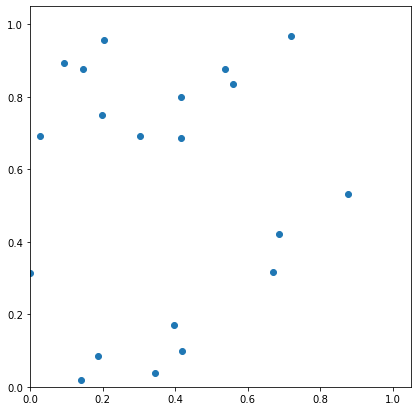

In [139]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, aspect=1) # aspect ratio

np.random.seed(1)

x = np.random.rand(20)
y = np.random.rand(20)

ax.scatter(x, y)
ax.set_xlim(0, 1.05)
ax.set_ylim(0, 1.05)

plt.show()

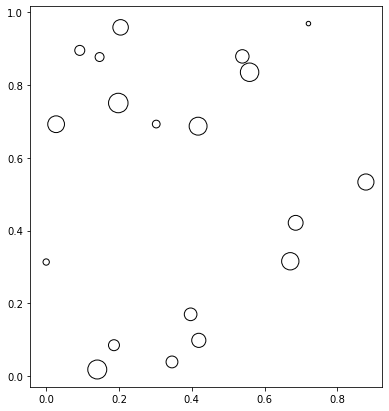

In [140]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, aspect=1)

np.random.seed(1)

x = np.random.rand(20)
y = np.random.rand(20)
s = np.arange(20) * 20

ax.scatter(x, y, 
           s=s,# marker size in points
           c='white',
           marker='o',
           linewidth=1,
           edgecolor='black')

plt.show()

In [141]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [142]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


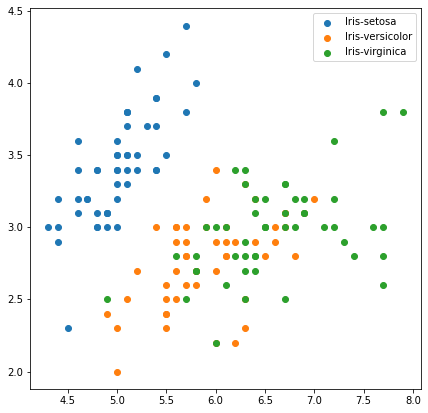

In [147]:
# unique(), iris_sub = iris[iris['Species']==species]
# ax.scatter(x, y, )

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for species in iris['Species'].unique():
    # for each species, create iris_sub
    iris_sub = iris[iris['Species']==species]
    # scatter plot for each iris_sub
    ax.scatter(x=iris_sub['SepalLengthCm'], 
               y=iris_sub['SepalWidthCm'], 
               label=species)

ax.legend()
plt.show()

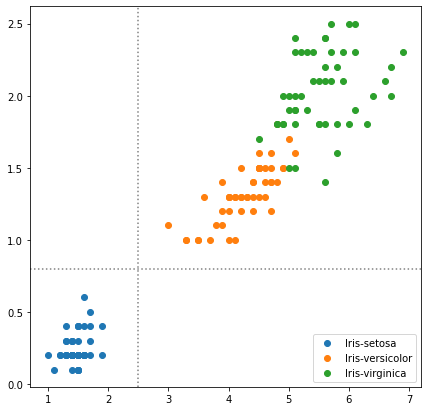

In [149]:
# line: axvline, axhline

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for species in iris['Species'].unique():
    iris_sub = iris[iris['Species']==species]
    ax.scatter(x=iris_sub['PetalLengthCm'], 
               y=iris_sub['PetalWidthCm'], 
               label=species)

ax.axvline(2.5, color='gray', linestyle=':')    
ax.axhline(0.8, color='gray', linestyle=':')    
ax.legend()    
plt.show()

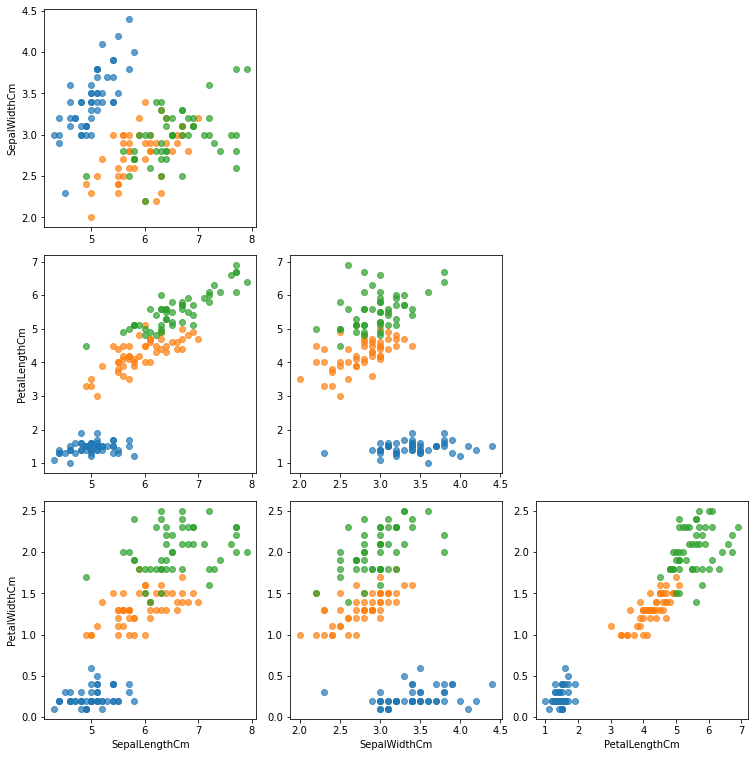

In [150]:
fig, axes = plt.subplots(4, 4, figsize=(14, 14))

feat = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, f1 in enumerate(feat):
    for j, f2 in enumerate(feat):
        if i <= j : 
            axes[i][j].set_visible(False)
            continue
        for species in iris['Species'].unique():
            iris_sub = iris[iris['Species']==species]
            axes[i][j].scatter(x=iris_sub[f2], 
                               y=iris_sub[f1], 
                               label=species, 
                               alpha=0.7)
        if i == 3: axes[i][j].set_xlabel(f2)
        if j == 0: axes[i][j].set_ylabel(f1)

plt.tight_layout()        
plt.show()